In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

In [4]:
%%html
<center><iframe 
width="420" height="315" src="https://www.youtube.com/embed/3liCbRZPrZA?rel=0" frameborder="0" allowfullscreen>
</iframe></center>

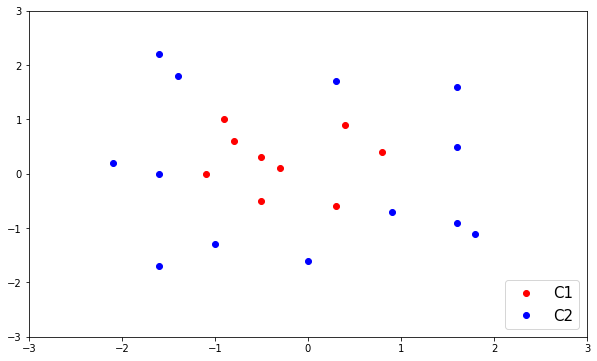

In [5]:
X1 = np.array([[-1.1,  0], [-0.3,  0.1], [-0.9,  1],[0.8,  0.4],[0.4,  0.9],[0.3,-0.6],[-0.5, 0.3],
        [-0.8,  0.6],[-0.5, -0.5]])
     
X2 = np.array([[-1,  -1.3], [-1.6 , 2.2],  [0.9, -0.7],[1.6,  0.5],[1.8, -1.1],[1.6,  1.6],[-1.6, -1.7],
        [-1.4,  1.8],[1.6, -0.9],[0, -1.6],[0.3, 1.7],[-1.6 , 0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='C2')
plt.axis([-3,3,-3,3])
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [8]:
N = X1.shape[0]  # C1 point 갯수
M = X2.shape[0]

X = np.vstack([X1, X2])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])  # 1~N만큼 1, N+1~N+M까지 -1

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.square(X[:,0]), np.sqrt(2)*np.multiply(X[:,0],X[:,1]),
              np.square(X[:,1])])

In [9]:
g = 1 
w = cvx.Variable(4, 1)
d = cvx.Variable(m, 1)

obj = cvx.Minimize(cvx.norm(w, 2) + g*np.ones([1,m])*d)
const = [cvx.mul_elemwise(y, Z*w) >= 1-d, d >= 0]
prob = cvx.Problem(obj, const).solve()

w = w.value

In [23]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

test_X = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
test_X = np.asmatrix(test_X)

m = test_X.shape[0]
test_Z = np.hstack([np.ones([m,1]), np.square(test_X[:,0]),
                    np.sqrt(2)*np.multiply(test_X[:,0],test_X[:,1]),
                    np.square(test_X[:,1])])

q = test_Z*w 

In [25]:
B = []

for i in range(m):
    if q[i,0] > 0:
        B.append(test_X[i,:])
        
B = np.vstack(B)
print(B)

[[-1.00000000e-01 -1.30000000e+00]
 [ 2.66453526e-15 -1.30000000e+00]
 [ 1.00000000e-01 -1.30000000e+00]
 ...
 [-1.00000000e-01  1.30000000e+00]
 [ 2.66453526e-15  1.30000000e+00]
 [ 1.00000000e-01  1.30000000e+00]]


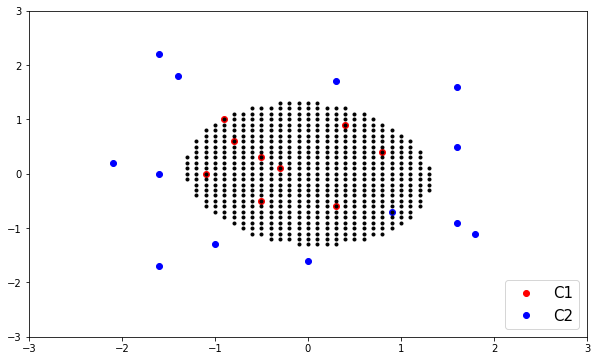

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(X1[:,0], X1[:,1], 'ro', label='C1')
plt.plot(X2[:,0], X2[:,1], 'bo', label='C2')
plt.plot(B[:,0], B[:,1], 'k.')
plt.axis([-3,3,-3,3])
plt.legend(loc = 4, fontsize = 15)
plt.show()